In [3]:
#Linear Regression
#import data
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = df_train.append(df_test)
df_new = pd.read_csv('Copy of film_collections.csv')

In [4]:
#data exploration and cleaning
print(df.dtypes)
print(df_new.dtypes)
df.drop(columns=["belongs_to_collection","budget","revenue"], axis=0)
df_new_select = df_new[['IMDB_ID','Budget','Revenue','Release_Date','Vote_Ave','Vote_Count','Belongs_to_Collection']]
df_new_select.head()

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                  float64
dtype: object
Unnamed: 0                 int64
IMDB_ID                   object
Title                     object
Budget                     int64
Popularity               float64
Revenue                    int64
Release_Date              obj

,IMDB_ID,Budget,Revenue,Release_Date,Vote_Ave,Vote_Count,Belongs_to_Collection
0,tt2637294,36000000,64780213,2015-02-20,5.2,705,"{'id': 313576, 'name': 'Hot Tub Time Machine C..."
1,tt0368933,40000000,134734481,2004-08-06,6.6,2635,"{'id': 107674, 'name': 'The Princess Diaries C..."
2,tt2582802,3300000,13092000,2014-10-10,8.4,11522,NaN
3,tt1821480,1200000,16000000,2012-03-08,7.4,208,"{'id': 499115, 'name': 'Kahaani Collection', '..."
4,tt1380152,0,3923970,2009-02-05,5.7,18,NaN


In [15]:
df_all = df_new_select.merge(df, how="left",left_on="IMDB_ID", right_on ="imdb_id")

In [16]:
df_all.head()

,IMDB_ID,Budget,Revenue,Release_Date,Vote_Ave,Vote_Count,Belongs_to_Collection,id,belongs_to_collection,budget,...,cast,crew,revenue,genres_list,languages_list,Keywords_list,production_companies_list,production_countries_list,franchise,primary_language
0,tt2637294,36000000,64780213,2015-02-20,5.2,705,"{'id': 313576, 'name': 'Hot Tub Time Machine C...",1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,...,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,[Comedy],[English],"[time travel, sequel, hot tub, duringcreditsst...","[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],1,English
1,tt0368933,40000000,134734481,2004-08-06,6.6,2635,"{'id': 107674, 'name': 'The Princess Diaries C...",2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,...,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,"[Comedy, Drama, Family, Romance]",[English],"[coronation, duty, marriage, falling in love]",[Walt Disney Pictures],[United States of America],1,English
2,tt2582802,3300000,13092000,2014-10-10,8.4,11522,NaN,3,NaN,3300000,...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,[Drama],[English],"[jazz, obsession, conservatory, music teacher,...","[Bold Films, Blumhouse Productions, Right of W...",[United States of America],0,English
3,tt1821480,1200000,16000000,2012-03-08,7.4,208,"{'id': 499115, 'name': 'Kahaani Collection', '...",4,NaN,1200000,...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0,"[Thriller, Drama]","[English, हिन्दी]","[mystery, bollywood, police corruption, crime,...",[],[India],0,English
4,tt1380152,0,3923970,2009-02-05,5.7,18,NaN,5,NaN,0,...,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0,"[Action, Thriller]",[한국어/조선말],[],[],[South Korea],0,한국어/조선말


In [12]:
#Data Cleaning
df.info()
# df['genres'] = df['genres'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
# df['spoken_languages'] = df['spoken_languages'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
# df['Keywords'] = df['Keywords'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
# df['production_companies'] = df['production_companies'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
# df['production_countries'] = df['production_countries'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 4397
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7398 non-null   int64  
 1   belongs_to_collection  1481 non-null   object 
 2   budget                 7398 non-null   int64  
 3   genres                 7375 non-null   object 
 4   homepage               2366 non-null   object 
 5   imdb_id                7398 non-null   object 
 6   original_language      7398 non-null   object 
 7   original_title         7398 non-null   object 
 8   overview               7376 non-null   object 
 9   popularity             7398 non-null   float64
 10  poster_path            7396 non-null   object 
 11  production_companies   6984 non-null   object 
 12  production_countries   7241 non-null   object 
 13  release_date           7397 non-null   object 
 14  runtime                7392 non-null   float64
 15  spok

In [17]:
#Write function to convert dictionary into array? standalone dictionary
import numpy as np
import pandas as pd
import ast

def dict_to_array(dicts):
    
    list_ = []
    for dict_ in dicts:
        try:
            list_.append(dict_['name'])
        except:
            continue
            
    return list_

In [38]:
production_list = df_all['production_companies_list'].tolist()
production_list[:10]

[['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)'],
 ['Walt Disney Pictures'],
 ['Bold Films', 'Blumhouse Productions', 'Right of Way Films'],
 [],
 [],
 [],
 ['Ghost House Pictures', 'North Box Productions'],
 [],
 ['Walt Disney Pictures', 'Jim Henson Productions', 'Jim Henson Company, The'],
 ['Castle Rock Entertainment']]

In [20]:
def count_production_companies(list_):

    master_list = {}
    for i in list_:
        if len(i) == 0:
            pass
        else:
            for j in i:
                if j in master_list.keys():
                    master_list[j] += 1
                else:
                    master_list[j] = 1
                    
    return master_list
        

In [21]:
production_dict = count_production_companies(production_list)

In [22]:
max(production_dict, key=production_dict.get)

'Warner Bros.'

<AxesSubplot:>

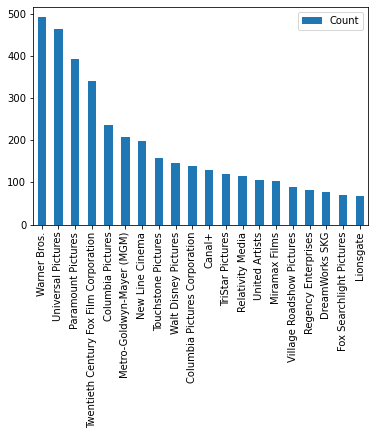

In [23]:
production_df = pd.DataFrame.from_dict(production_dict,orient="index",columns=['Count'])
production_df = production_df.sort_values(by="Count",ascending=False)
production_df[:20].plot.bar()

In [34]:
topx = production_df[:9].index.tolist()
topx

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'New Line Cinema',
 'Touchstone Pictures',
 'Walt Disney Pictures']

In [35]:
def topx_production_company(list_):
    for i in list_:
        if i in topx:
            return True
    
    return False

In [36]:
df_all['topx_production_company'] = df_all['production_companies_list'].map(lambda x: topx_production_company(x))

In [37]:
df_all.head()

,IMDB_ID,Budget,Revenue,Release_Date,Vote_Ave,Vote_Count,Belongs_to_Collection,id,belongs_to_collection,budget,...,crew,revenue,genres_list,languages_list,Keywords_list,production_companies_list,production_countries_list,franchise,primary_language,topx_production_company
0,tt2637294,36000000,64780213,2015-02-20,5.2,705,"{'id': 313576, 'name': 'Hot Tub Time Machine C...",1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,[Comedy],[English],"[time travel, sequel, hot tub, duringcreditsst...","[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],1,English,True
1,tt0368933,40000000,134734481,2004-08-06,6.6,2635,"{'id': 107674, 'name': 'The Princess Diaries C...",2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,"[Comedy, Drama, Family, Romance]",[English],"[coronation, duty, marriage, falling in love]",[Walt Disney Pictures],[United States of America],1,English,True
2,tt2582802,3300000,13092000,2014-10-10,8.4,11522,NaN,3,NaN,3300000,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,[Drama],[English],"[jazz, obsession, conservatory, music teacher,...","[Bold Films, Blumhouse Productions, Right of W...",[United States of America],0,English,False
3,tt1821480,1200000,16000000,2012-03-08,7.4,208,"{'id': 499115, 'name': 'Kahaani Collection', '...",4,NaN,1200000,...,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0,"[Thriller, Drama]","[English, हिन्दी]","[mystery, bollywood, police corruption, crime,...",[],[India],0,English,False
4,tt1380152,0,3923970,2009-02-05,5.7,18,NaN,5,NaN,0,...,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0,"[Action, Thriller]",[한국어/조선말],[],[],[South Korea],0,한국어/조선말,False


In [ ]:
#season

In [13]:
df['genres_list'] = df['genres'].map(lambda x: dict_to_array(x))
df['languages_list'] = df['spoken_languages'].map(lambda x: dict_to_array(x))
df['Keywords_list'] = df['Keywords'].map(lambda x: dict_to_array(x))
df['production_companies_list'] = df['production_companies'].map(lambda x: dict_to_array(x))
df['production_countries_list'] = df['production_countries'].map(lambda x: dict_to_array(x))

In [215]:
df['release_date'].describe()

<ipython-input-215-1fda778c69b5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['release_date'].describe()


count                    7397
unique                   4703
top       2010-09-10 00:00:00
freq                       10
first     1971-01-15 00:00:00
last      2070-12-23 00:00:00
Name: release_date, dtype: object

In [14]:
df['franchise'] = np.where(pd.isnull(df['belongs_to_collection']), 0, 1)
df['release_date'] = pd.to_datetime(df['release_date'])
df['primary_language'] = df['languages_list'].apply(lambda x: None if x == [] else x[0])

In [276]:
df = df[df['original_language']=='en']
df['main_genre'] = df['genres_list'].apply(lambda x: None if x == [] else x[0])
df_gb1 = df.groupby(df['main_genre'])

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,cast,crew,revenue,genres_list,franchise,languages_list,Keywords_list,production_companies_list,production_countries_list,primary_language
main_genre,,,,,,,,,,,,,,,,,,,,,
Action,1021,306,1021,1021,320,1021,1021,1021,1021,1021,...,1009,1009,447,1021,1021,1021,1021,1021,1021,1021
Adventure,430,173,430,430,179,430,430,430,430,430,...,427,427,171,430,430,430,430,430,430,425
Animation,150,56,150,150,80,150,150,150,150,150,...,149,148,58,150,150,150,150,150,150,149
Comedy,1396,222,1396,1396,394,1396,1396,1396,1395,1396,...,1393,1392,543,1396,1396,1396,1396,1396,1396,1385
Crime,294,32,294,294,85,294,294,294,294,294,...,293,293,128,294,294,294,294,294,294,292
Documentary,174,9,174,174,104,174,174,174,174,174,...,174,174,66,174,174,174,174,174,174,163
Drama,1558,100,1558,1558,484,1558,1558,1558,1558,1558,...,1555,1553,629,1558,1558,1558,1558,1558,1558,1541
Family,72,29,72,72,36,72,72,72,72,72,...,72,72,33,72,72,72,72,72,72,72
Fantasy,152,47,152,152,57,152,152,152,152,152,...,151,151,54,152,152,152,152,152,152,152


In [42]:
df_words = df[['original_title','overview','tagline','title','Keywords_list','original_language','revenue']]
df_words = df_words[df_words['original_language']=='en']
df_words = df_words[['overview','tagline','title','Keywords_list']]
df_words

,overview,tagline,title,Keywords_list
0,"When Lou, who has become the ""father of the In...",The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst..."
1,Mia Thermopolis is now a college graduate and ...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]"
2,"Under the direction of a ruthless instructor, ...",The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,..."
5,"Pinocchio and his friends, a glow worm and a m...",NaN,Pinocchio and the Emperor of the Night,[]
6,A young girl buys an antique box at a yard sal...,Fear The Demon That Doesn't Fear God,The Possession,[]
...,...,...,...,...
4392,"The year is 2029. John Connor, leader of the r...",Reset the future,Terminator Genisys,"[saving the world, artificial intelligence, cy..."
4393,A young man is plunged into a life of subterfu...,This is not a love story - it's a story about ...,Original Sin,"[women, sex, cuba, eroticism, lover (female), ..."
4394,"Three friends, whose lives have been drifting ...","The call of the wild, the thrill of adventure....",Without a Paddle,"[death of a friend, treasure hunt]"
4395,"Frank Galvin is a down-on-his luck lawyer, red...","The doctors want to settle, the Church wants t...",The Verdict,"[boston, court, malpractice, alcoholic, courtr..."


In [72]:
import re
import string
import nltk

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
#     text = [word.lower() for word in text if word not in string.punctuation]
#     print(text)
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [73]:
df_words['combined'] = df_words[['overview','tagline','title']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_words['combined'].dropna(inplace=True)
df_words['body_text'] = df_words['combined'].apply(lambda x: clean_text(x))

In [88]:
df_words.dtypes

overview         object
tagline          object
title            object
Keywords_list    object
combined         object
body_text        object
dtype: object

In [64]:
df_test = df[['budget','popularity','runtime','revenue']]
df_test = df_test[df_test['budget']>1000]
df_test = df_test[df_test['runtime']>0]
print(len(df_test))
df_test.head()

5311


,budget,popularity,runtime,revenue
0,14000000,6.575393,93.0,12314651.0
1,40000000,8.248895,113.0,95149435.0
2,3300000,64.299990,105.0,13092000.0
3,1200000,3.174936,122.0,16000000.0
5,8000000,0.743274,83.0,3261638.0


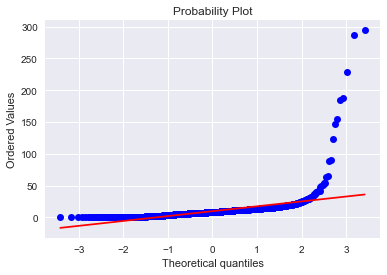

In [25]:
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(df_test['popularity'], dist="norm", plot=pylab)
pylab.show()

In [26]:
df_test.corr()

,budget,popularity,runtime,revenue
budget,1.000000,0.309320,0.221425,0.739325
popularity,0.309320,1.000000,0.116795,0.443648
runtime,0.221425,0.116795,1.000000,0.208063
revenue,0.739325,0.443648,0.208063,1.000000


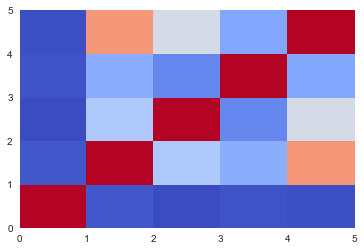

In [27]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

In [77]:
#creating the model
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_test, test_size = 0.3)
x_train = train.iloc[0:,0:3]
y_train = train['revenue']
x_test = test.iloc[0:,0:3]
y_test = test['revenue']
y_train

2992      1213880
2240       572809
588       5000000
2772      3324330
2564     18317151
          ...    
211     470654000
998     164433867
518     820580447
34      258022233
1788    104931801
Name: revenue, Length: 1514, dtype: int64

In [33]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [34]:
testing_predictions  = model.predict(x_test)
testing_predictions

array([ 1.31587433e+07,  2.41761836e+08,  4.83814831e+07,  4.89261385e+07,
        1.68883069e+08, -2.37770695e+06, -9.05707554e+06, -2.81938567e+05,
        8.02780540e+07,  4.01597675e+08,  1.10983473e+08,  1.65831611e+08,
        1.92124535e+08,  5.64033736e+07,  4.93831736e+07,  1.34157582e+07,
        5.05789312e+05,  5.67370126e+08,  1.21848862e+08, -3.15071994e+06,
        9.31804326e+06,  1.01486936e+08,  1.12959175e+08,  3.72907984e+07,
        1.18899433e+07,  7.62172312e+06,  2.39334073e+07,  1.69784888e+08,
        1.88546069e+07,  2.49990273e+07,  5.60935001e+07,  5.97520275e+07,
        1.60958732e+07,  8.23060878e+07,  3.13407944e+07,  7.72520351e+07,
        5.91355950e+07,  1.26700950e+08,  8.91443155e+07,  1.96573145e+08,
        7.77282586e+07,  1.71294959e+08,  6.75196915e+07,  8.80251421e+05,
        4.25989838e+07,  8.84793283e+07,  2.77206672e+07,  8.09967777e+08,
        7.89820357e+07,  1.19839086e+08,  2.69122507e+08, -1.46829857e+07,
        1.52974588e+07,  

In [40]:
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.5857533150672909
Testing R-Square 0.6263916654095594


In [ ]:
#NN test

In [70]:
def sigmoid(x,deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

def run_net(X,y,activation_function=sigmoid,passes=10):
    np.random.seed(1)
    syn0 = np.random.random((3,1))
    for i in range(0,passes):
        level_0 = X
        level_1 = activation_function(np.dot(level_0,syn0))
        level_1_error = y - level_1 #error
        level_1_delta = level_1_error * activation_function(level_1,True)
        syn0 += np.dot(level_0.T,level_1_delta)
    return syn0

In [78]:
print(x_train.shape)
#y_train = y_train[:,np.newaxis]
print(y_train.shape)

(1514, 3)
(1514, 1)


<ipython-input-78-3b0e8e4afed2>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = y_train[:,np.newaxis]


In [81]:
syn_test = run_net(x_train,y_train,activation_function=sigmoid,passes=10)

In [82]:
syn_test

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04]])

In [83]:
y_model = np.dot(x_test,syn_test)

In [84]:
output = y_test.to_frame().join(x_test)

In [88]:
output['y_model'] = np.dot(x_test,syn_test),5

TypeError: type numpy.ndarray doesn't define __round__ method

In [95]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

,revenue,budget,popularity,runtime,y_model
2624,252434250,5000000,36.89481,104.00000,2085136.61164
2462,6212282,18000000,12.68293,112.00000,7506405.23328
310,8459458,15000000,10.44587,96.00000,6255337.60593
2270,3000000,500000,8.21240,110.00000,208516.93052
1006,30,2000000,0.71760,90.00000,834044.53660
...,...,...,...,...,...
1079,6860853,7000000,6.86802,95.00000,2919158.99099
552,141591324,40000000,10.93907,98.00000,16680888.07899
1075,1984662,800000,7.97473,91.00000,333623.35856
1803,15425,2500,0.40475,78.00000,1042.85549


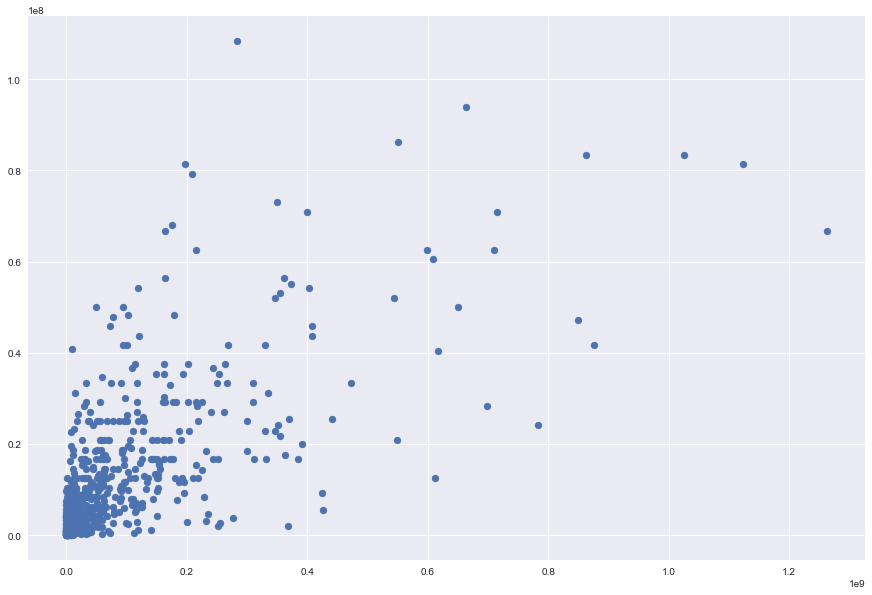

In [99]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(output['revenue'],output['y_model'])